In [1]:
from PIL import Image
import os

os.chdir("../")

In [2]:
os.getcwd()

'/home/diogor/github/project-based-learning/ascii_generator'

In [3]:
img_dir = "imgs/"
img_name = "ascii-pineapple.jpg"

In [4]:
image = Image.open(img_dir + img_name)

In [5]:
width, height = image.size

In [6]:
print("Successfully loaded image!")
print(f"Image size: {width} x {height}")

Successfully loaded image!
Image size: 700 x 467


In [7]:
dir(image)

['_Image__transformer',
 '__annotations__',
 '__array_interface__',
 '__arrow_c_array__',
 '__arrow_c_schema__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_close_fp',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_exif_offset',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_huffman_ac',
 '_huffman_dc',
 '_im',
 '_min_frame',
 '_mode',
 '_new',
 '_open',
 '_read_dpi_from_exif',
 '_readonly',
 '_reload_exif',
 '_repr_image',
 '_repr_jpeg_',
 '_repr_png_',
 '_repr_pretty_',
 '_seek_check',
 '_siz

In [14]:
import numpy as np

img_array = np.array(image)

In [15]:
img_array.shape

(467, 700, 3)

In [23]:
for x in range(len(img_array)):
    for y in range(len(img_array[x])):
        pixel = img_array[x][y]
        print(pixel, type(pixel), pixel.mean())
        break
    break

[  1 116 209] <class 'numpy.ndarray'> 108.66666666666667


In [24]:
def color_to_brightness(pixel: np.ndarray):

    brightness = np.mean(pixel, dtype=int)
    return brightness

In [30]:
brightness_matrix = np.apply_along_axis(color_to_brightness, axis=2, arr=img_array)

In [32]:
brightness_matrix[:20]

array([[108, 108, 108, ..., 117, 117, 117],
       [108, 108, 108, ..., 117, 117, 117],
       [108, 108, 108, ..., 117, 117, 117],
       ...,
       [112, 112, 112, ..., 119, 119, 119],
       [112, 112, 112, ..., 119, 119, 119],
       [113, 113, 113, ..., 120, 120, 120]], shape=(20, 700))

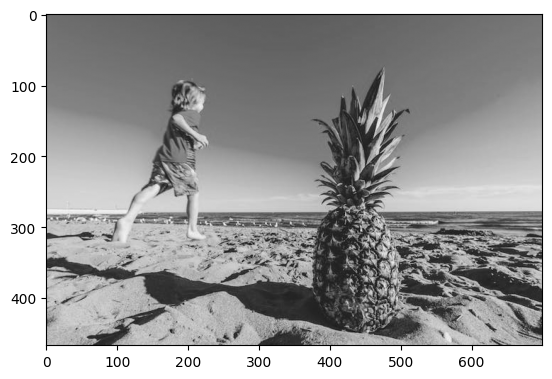

In [36]:
# Display monochrome image

import matplotlib.pyplot as plt

plt.imshow(brightness_matrix, cmap="gray")

In [37]:
ascii_str = "`^\",:;Il!i~+_-?][}{1)(|\\/tfjrxnuvczXYUJCLQ0OZmwqpdbkhao*#MW&8%B@$"
len(ascii_str)

65

In [39]:
print(brightness_matrix.min(), brightness_matrix.max())

0 252


In [66]:
norm_brightness = brightness_matrix / brightness_matrix.max()

In [68]:
indices = (norm_brightness * (len(ascii_str) - 1)).astype(int)

In [79]:
ascii_arr = np.array([[ascii_str[x] for x in row] for row in indices])

In [81]:
print(ascii_arr)

[['j' 'j' 'j' ... 'x' 'x' 'x']
 ['j' 'j' 'j' ... 'x' 'x' 'x']
 ['j' 'j' 'j' ... 'x' 'x' 'x']
 ...
 ['w' 'w' 'w' ... 'Q' 'Q' 'Q']
 ['p' 'q' 'q' ... 'O' '0' '0']
 ['d' 'p' 'p' ... 'Z' 'O' 'O']]
